# Easy
Открыть набор данных dota_hero_stats.csv из папки data.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по Dota2.

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и посчитайте количество героев для каждого значения legs

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [2]:
dota_df = pd.read_csv('/home/euegene/learn/DS_Learn/Data/dota_hero_stats.csv')

In [3]:
dota_df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Решение

In [4]:
dota_df.groupby(['legs'])['roles'].count()

legs
0    11
2    95
4     7
6     3
8     1
Name: roles, dtype: int64

# Normal (вероятно не понято)
Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик. Выведите список героев с этим набором характеристик

In [308]:
dota_df.head() #выводим тест записи

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"Carry, Escape, Nuker"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"Initiator, Durable, Disabler, Jungler"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"Support, Disabler, Nuker, Durable"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"Carry, Disabler, Jungler, Nuker, Initiator"
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"Support, Disabler, Nuker, Jungler"


In [5]:
dota_df['roles']= dota_df['roles'].str.strip('[]').str.replace("'","").astype(str) #удаляем символы [ ] ' из roles

In [7]:
dota = dota_df.assign(roles = dota_df.roles.str.split(",")).explode('roles') #раскрываем списки из 'roles' в строки
dota #получаем большую таблицу 

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Carry
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Escape
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,Nuker
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,Initiator
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,Durable
...,...,...,...,...,...,...,...,...
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,Escape
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Carry
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Initiator
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,Disabler


In [8]:
m = "".join(dota['roles'].mode()) #находим моду из колонки 'roles' и преобразуем в строку для дальнейшей подстановки
m

' Disabler'

In [53]:
dota_mode = dota.loc[dota['roles']== m] #выводим всех героев с самой распространенной характеристикой
dota_mode

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,Disabler
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,Disabler
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,Disabler
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,Disabler
5,5,Ranged,6,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,Disabler
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,Disabler
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,Disabler
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,Disabler
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,Disabler


# По этому заданию есть вопросы:
1) Зачем что то группировать чтобы определить часто повторяющееся значение, если это можно сделать без группировки
2) Как совместить groupby и loc правильно
3) Как задать в matplotlib диапазон текстовых значений

# Hard (не сделано до конца)
В колонке roles находится список того, к каким ролям приписывают создатели Dota того или иного героя. Так же у каждого героя есть его основная характеристика, которая записана в колонке primary_attr.

1) Для каждой роли требуется построить bar plot на котором будет видно какое колличество раз героев с тем или иным основным атрибутам создатели игры относят к данной роли.

2) Так же требуется сделать обратный график: для каждого основного аттрибута сделайте bar plot на котором будет видно какое колличество раз создатели Dota относили героя с этим атрибутом к конкретной роли.

3) Сделайте выводы по полученым графикам (это могут быть совершенно любые выводы)

In [55]:
attr_count = dota_mode.loc[dota_mode['roles']== m]['primary_attr'].count() #считаем сколько primary_attr было отнесено к самой популярной роли
attr_count

83

In [67]:
count = dota_mode.groupby(by='primary_attr')['roles'].count() #считаем сколько раз ту или иную характеристику относили к ролям
list(count)
count

primary_attr
agi    19
int    34
str    30
Name: roles, dtype: int64

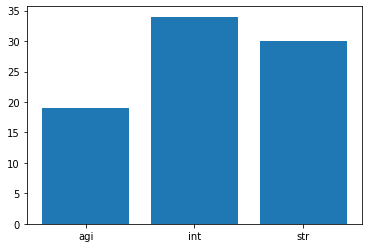

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
y = list(count)
x = np.arange(3)
plt.bar(x, height=y)
plt.xticks(x, ['agi','int','str']);